In [19]:
# 1. Import Library
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [20]:
# 2. Load Data
file_path = "./OutputRGB/Hasil_RGB_ExG_HH01.xlsx"
df = pd.read_excel(file_path)
df

,Rata-rata R,Rata-rata G,Rata-rata B,Excess Green (ExG)
0,148.662162,150.816216,117.499189,35.471081


In [21]:
# 3. Pisahkan Fitur (X) dan Target (y)
X = df[["Rata-rata R", "Rata-rata G", "Rata-rata B"]]
y = df["Excess Green (ExG)"]

In [22]:
# 4. Normalisasi Fitur RGB ke Rentang [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# 5. Training Data
X_train, X_test, y_train, y_test = X_scaled, X_scaled, y, y

In [24]:
# 6. Melatih Model Regresi Linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# 7. Prediksi
y_pred = model.predict(X_test)

In [26]:
# 8. Evaluasi Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Hindari pembagian dengan nol pada MAPE
y_test_safe = y_test.replace(0, np.finfo(float).eps)
mape = np.mean(np.abs((y_test_safe - y_pred) / y_test_safe)) * 100

# Persentase MAE dan RMSE terhadap rata-rata aktual
mean_actual = np.mean(y_test)
mae_pct = (mae / mean_actual) * 100
rmse_pct = (rmse / mean_actual) * 100

# Hasil Evaluasi
print("\n========== Evaluasi Model ==========")
print(f"MAE    : {mae:.2f}")
print(f"MSE    : {mse:.2f}")
print(f"RMSE   : {rmse:.2f}")
print(f"R²     : {r2:.4f}")
print(f"MAPE   : {mape:.2f}%")


========== Evaluasi Model ==========
MAE    : 0.00
MSE    : 0.00
RMSE   : 0.00
R²     : nan
MAPE   : 0.00%


d:\Tugas Kuliah\Semester 8\Tes\.venv\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


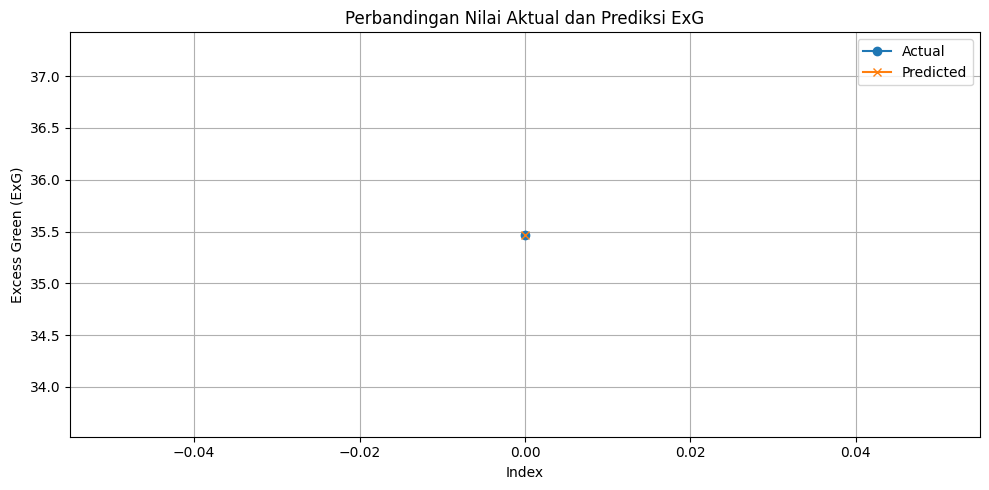

In [27]:
# 9. Visualisasi Hasil Prediksi vs Aktual
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Perbandingan Nilai Aktual dan Prediksi ExG')
plt.xlabel('Index')
plt.ylabel('Excess Green (ExG)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()